# Covid-19 Diagnosis using Chest X-ray Images

**Machine Learning Project which creates an image classifier using Keras by implementing a Convolution Neural Network(CNN) to differentiate between Chest X-rays images with a COVID-19 infectious person versus Normal Healthy people. The dataset contains the lungs X-ray images of both groups(COVID-19 and Healthy patients).<ul><li>Imported necessary libraries and Data Exploration<li>Data visualization, displayed 10 Chest X-ray images of Covid-19 and Normal Healthy People using Matplotlib.<li>Data Pre-processing and Augmentation, technique which is used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.<li>Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.<li>ImageDataGenerator, a Keras Deep Learning library can be used for an image dataset which is located on disk in a specified directory, where images in that directory are organized into subdirectories according to their class.It can also be used to specify the validation dataset and the test dataset.<li>Building the model, Sequential model is used to build the model layer by layer and many layers can be added to the model using add function <li>Conv2D layer creates a convolution kernel that winds with layers input which helps produce a tensor of outputs.<li>Max Pooling to reduce the spatial dimensions of the output volume.<li>Dropout is used to dropout some percentage of features or the probability at which outputs of the layer are retained. and implemented per layer in neural network<li>Dense layer receives output from every neuron of its preceding layer i.e, neurons of the layer are connected to every neuron of its preceding layer.<li>Compiled the model using Adam optimization algorithm, accuracy as evaluation metrics and binary cross entropy as loss measure.<li>Trained the model using training data and validation data and calculated accuracy and loss at each epoch<li>Plotted graphs using Matplotlib to visualize the loss between training and validation data, accuracy between training and validation data<li>Evaluated the model using test dataset and displayed the accuracy and cross entropy loss<li>Performed prediction on new data and stored the model into model.h5 file<li>Python web framework Flask is used to display the Covid-19 Diagnosis as an application.**

### Importing libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mping

import warnings
warnings.filterwarnings("ignore")

### Exploring the dataset

In [2]:
main_dir = "datasets\Data"

train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")

In [3]:
# print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (1).jpeg', 'COVID-19 (1).png', 'COVID-19 (10).jpeg', 'COVID-19 (101).jpg', 'COVID-19 (107).jpg', 'COVID-19 (11).jpeg', 'COVID-19 (11).jpg', 'COVID-19 (12).jpeg', 'COVID-19 (12).jpg', 'COVID-19 (13).jpeg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']
['COVID-19 (313).jpg', 'COVID-19 (353).jpg', 'COVID-19 (371).jpg', 'COVID-19 (425).jpg', 'COVID-19 (439).jpg', 'COVID-19 (457).jpg', 'COVID-19 (461).jpg', 'COVID-19 (475).jpg', 'COVID-19 (479).jpg', 'COVID-19 (485).jpg']
['NORMAL(10).jpg', 'NORMAL(1001).jpg', 'NORMAL(1003).jpg', 'NORMAL(1004).jpg', 'NORMAL(1011).jpg', 'NORMAL(1012).jpg', 'NORMAL(1015).jpg', 'NORMAL(1017).jpg', 'NORMAL(1020).jpg', 'NORMAL(1022).jpg']


In [4]:
# print the total number of images present in each directory
print("Total images present in the training set: ", len(train_covid_names + train_normal_names))
print("Total images present in the testing set: ", len(test_covid_names + test_normal_names))

Total images present in the training set:  1811
Total images present in the testing set:  484


# Data Visualization

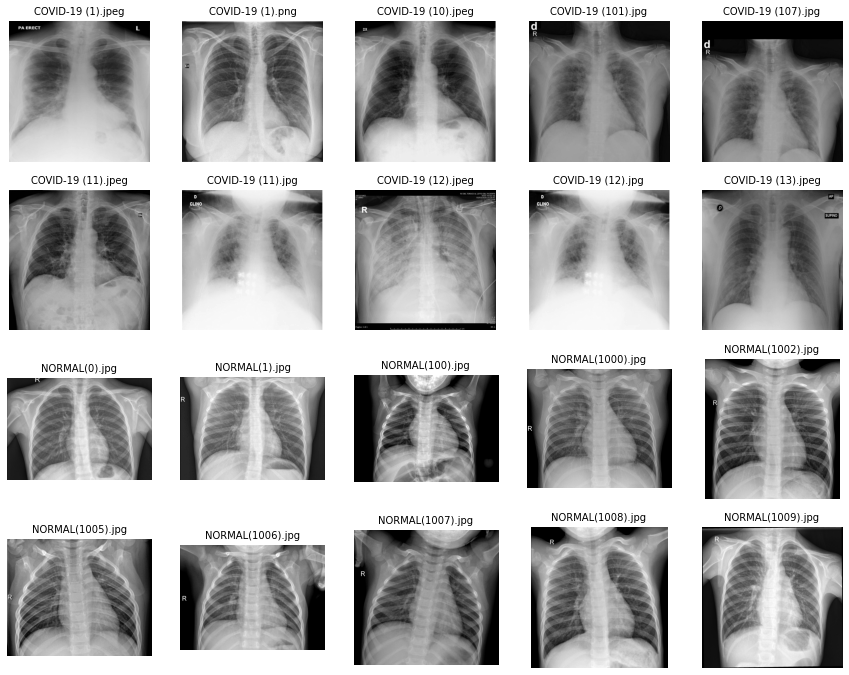

In [6]:
rows = 5
cols = 5
fig = plt.gcf()
fig.set_size_inches(15, 15)

covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:10]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:10]]

#print(covid_pic)
#print(normal_pic)

# merge the covid and normal list
merged_list = covid_pic + normal_pic

for i, img_path in enumerate(merged_list):
    data = img_path.split("\\", 4)[4]
    sp = plt.subplot(rows, cols, i+1)
    sp.axis("Off")
    img = mping.imread(img_path)
    sp.set_title(data, fontsize = 10)
    plt.imshow(img, cmap = "gray")

plt.show()

# Data Preprocessing and Augmentation

In [7]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale = 1./255)


train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = "training",
                                                 batch_size = 32,
                                                 class_mode = "binary") 

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = "validation",
                                                 batch_size = 32,
                                                 class_mode = "binary")

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = "binary") 


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

#  Build Convolutional Neural Network Model

In [10]:
model = Sequential()
# add the convolutional layer
model.add(Conv2D(32, (5,5), padding = "SAME", activation = "relu", input_shape = (150, 150, 3))) #(, size of filter, padding, actiavtion fn) and get the features
# pooling layer to reduce dimensionality with retaining all the image info
model.add(MaxPooling2D(pool_size = (2, 2)))
# place a dropout layer
model.add(Dropout(0.5)) # 50 percent of features are dropped


# add another convolutional layer
model.add(Conv2D(64, (5,5), padding = "SAME", activation = "relu"))
# pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))
# place a dropout layer
model.add(Dropout(0.5))


# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = "relu"))
# place a dropout layer
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid")) # 1 means binary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train the Model

In [11]:
#compile the model
model.compile(Adam(lr = 0.001), loss = "binary_crossentropy", metrics = ['accuracy'])

In [12]:
#train the model
history = model.fit(train_generator, epochs = 30, validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 130s 3s/step - loss: 0.9439 - accuracy: 0.7502 - val_loss: 0.3321 - val_accuracy: 0.8895
Epoch 2/30
46/46 [==============================] - 127s 3s/step - loss: 0.2556 - accuracy: 0.8992 - val_loss: 0.2778 - val_accuracy: 0.9199
Epoch 3/30
46/46 [==============================] - 123s 3s/step - loss: 0.2364 - accuracy: 0.9061 - val_loss: 0.2176 - val_accuracy: 0.9365
Epoch 4/30
46/46 [==============================] - 123s 3s/step - loss: 0.1829 - accuracy: 0.9331 - val_loss: 0.1302 - val_accuracy: 0.9724
Epoch 5/30
46/46 [==============================] - 125s 3s/step - loss: 0.1475 - accuracy: 0.9489 - val_loss: 0.1217 - val_accuracy: 0.9586
Epoch 6/30
46/46 [==============================] - 124s 3s/step - loss: 0.1210 - accuracy: 0.9558 - val_loss: 0.1064 - val_accuracy: 0.9641
Epoch 7/30
46/46 [==============================] - 130s 3s/step - loss: 0.1156 - accuracy: 0.9558 - val_loss: 0.1019 - val_accuracy: 0.9586
Epoch 8/30
46

# Performance Evaluation

In [13]:
# get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

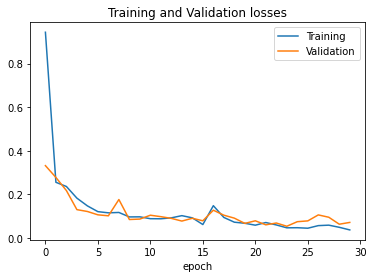

In [14]:
# plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation losses")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

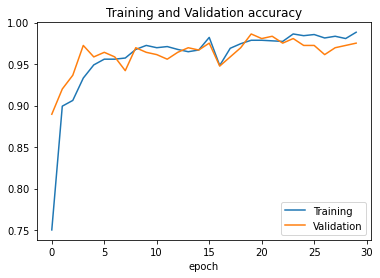

In [15]:
# plot graph betwwen training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation accuracy")
plt.xlabel("epoch")

In [16]:
# get the test accuracy and loss
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss: :", test_loss)
print("Test accuracy: ", test_accuracy)

16/16 [==============================] - 40s 3s/step - loss: 0.0773 - accuracy: 0.9669
Test Loss: : 0.07727887481451035
Test accuracy:  0.9669421315193176


# Prediction on New Data

In [17]:
from keras.preprocessing import image
img_path = input("Enter the url path for an image...")
img = image.load_img(img_path, target_size = (150, 150))
images = image.img_to_array(img)
images = np.expand_dims(images, axis = 0)
predictions = model.predict(images)
print("================================")
if predictions == 0:
    print("Covid positive")
else:
    print("Your report is normal")

Enter the url path for an image...test_data/covid1.jpg
Covid positive


## Flask in python

In [18]:
# storing the model into model.h5 file
import tensorflow
tensorflow.keras.models.save_model(model,"model.h5")

In [19]:
# Run: python app.py